In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
emp_data = pd.read_csv('C:/Users/oyedeepak/Downloads/Assignment/Simple Linear Regression/emp_data.csv')

In [3]:
emp_data.columns

Index(['Salary_hike', 'Churn_out_rate'], dtype='object')

(array([2., 1., 2., 1., 1., 1., 0., 1., 0., 1.]),
 array([1580., 1609., 1638., 1667., 1696., 1725., 1754., 1783., 1812.,
        1841., 1870.]),
 <a list of 10 Patch objects>)

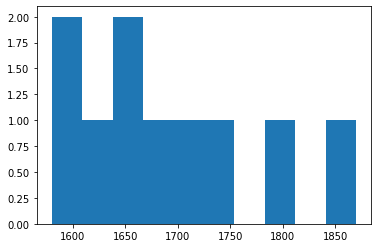

In [4]:
#plotting histogram
plt.hist(emp_data.Salary_hike)

{'whiskers': [<matplotlib.lines.Line2D at 0x2000d5c3988>,
 'caps': [<matplotlib.lines.Line2D at 0x2000d5d8e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2000ce166c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2000d5deb88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2000d5dec88>],
 'means': []}

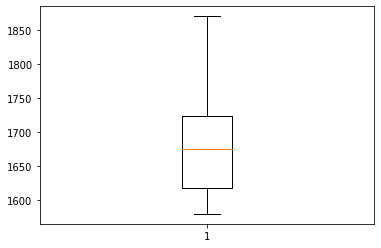

In [5]:
#plotting boxplot
plt.boxplot(emp_data.Salary_hike)

(array([2., 1., 1., 2., 1., 0., 1., 1., 0., 1.]),
 array([60. , 63.2, 66.4, 69.6, 72.8, 76. , 79.2, 82.4, 85.6, 88.8, 92. ]),
 <a list of 10 Patch objects>)

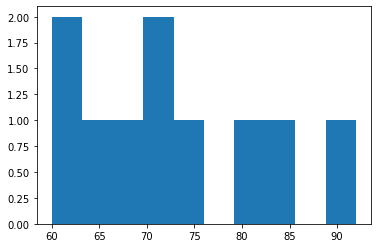

In [6]:
plt.hist(emp_data.Churn_out_rate)

{'whiskers': [<matplotlib.lines.Line2D at 0x2000d6d63c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2000d6d6c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2000d6d29c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2000d6dbb88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2000d6dfa08>],
 'means': []}

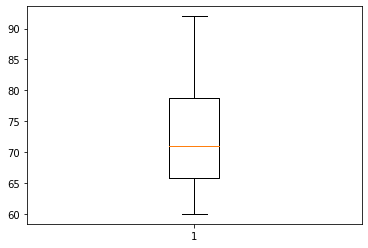

In [7]:
plt.boxplot(emp_data.Churn_out_rate)

In [8]:
emp_data.corr()
#correlation is -0.911, thus inversely proportional 

,Salary_hike,Churn_out_rate
Salary_hike,1.000000,-0.911722
Churn_out_rate,-0.911722,1.000000


In [9]:
import statsmodels.formula.api as smf
model = smf.ols('Churn_out_rate~Salary_hike', data = emp_data).fit()
model.summary()

# R-sq = 0.831, adjust. R-sq = 0.810, can be improved

C:\Users\oyedeepak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Mon, 11 May 2020   Prob (F-statistic):           0.000239
Time:                        14:18:07   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     244.3649     27.352      8.934      0.000     181.291     307.439
Salary_hike    -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
model.conf_int(0.05) # 95% confidence interval


,0,1
Intercept,181.291232,307.438591
Salary_hike,-0.138845,-0.064240


In [11]:
pred = model.predict(emp_data) # Predicted values


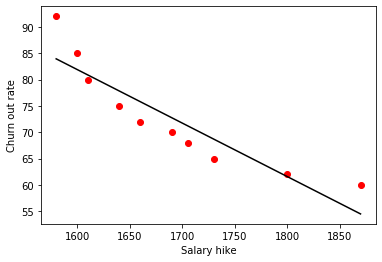

In [12]:
plt.scatter(x=emp_data['Salary_hike'],y=emp_data['Churn_out_rate'],color='red')
plt.plot(emp_data['Salary_hike'],pred,color='black')
plt.xlabel('Salary hike');plt.ylabel('Churn out rate')
plt.show()

In [13]:
model2 = smf.ols('np.log(Churn_out_rate)~(Salary_hike)', data = emp_data).fit()
model2.summary()

C:\Users\oyedeepak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(Churn_out_rate)   R-squared:                       0.874
Model:                                OLS   Adj. R-squared:                  0.858
Method:                     Least Squares   F-statistic:                     55.26
Date:                    Mon, 11 May 2020   Prob (F-statistic):           7.38e-05
Time:                            14:18:31   Log-Likelihood:                 16.511
No. Observations:                      10   AIC:                            -29.02
Df Residuals:                           8   BIC:                            -28.42
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.6383      0.318     20.902      0.000       5.906       7.371
Salary_hike    -0.0014      0.000     -7.434      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        1.935   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.314
Skew:                           0.780   Prob(JB):                        0.519
Kurtosis:                       2.152   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model2.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,5.905917,7.370683
Salary_hike,-0.001829,-0.000963


In [15]:
pred2 = model2.predict(emp_data)

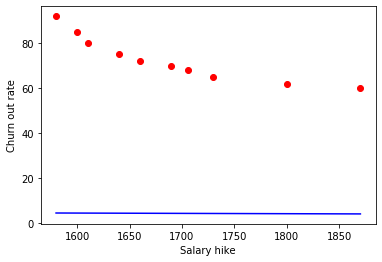

In [16]:
plt.scatter(x=emp_data['Salary_hike'],y=emp_data['Churn_out_rate'],color='red')
plt.plot(emp_data['Salary_hike'],pred2,color='blue')
plt.xlabel('Salary hike');plt.ylabel('Churn out rate')
plt.show()

In [17]:
emp_data['Salary_hike_sq'] = emp_data.Salary_hike*emp_data.Salary_hike

model3 = smf.ols('(Churn_out_rate)~(Salary_hike+Salary_hike_sq)', data = emp_data).fit()
model3.summary()

C:\Users\oyedeepak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     129.6
Date:                Mon, 11 May 2020   Prob (F-statistic):           2.95e-06
Time:                        14:19:14   Log-Likelihood:                -18.751
No. Observations:                  10   AIC:                             43.50
Df Residuals:                       7   BIC:                             44.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1647.0116    228.059      7.222      0.000    1107.738    2186.285
Salary_hike       -1.7371      0.266     -6.538      0.000      -2.365      -1.109
Salary_hike_sq     0.0005   7.72e-05      6.158      0.000       0.000       0.001
==============================================================================
Omnibus:                        0.169   Durbin-Watson:                   1.152
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.362
Skew:                           0.028   Prob(JB):                        0.835
Kurtosis:                       2.070   Cond. No.                     1.10e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
pred3 = model3.predict(emp_data)

In [19]:
model3.conf_int(0.05) # 


,0,1
Intercept,1107.738347,2186.284946
Salary_hike,-2.365306,-1.108872
Salary_hike_sq,0.000293,0.000658


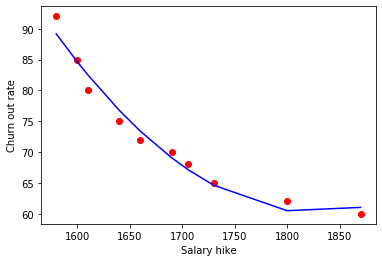

In [21]:
plt.scatter(x=emp_data['Salary_hike'],y=emp_data['Churn_out_rate'],color='red')
plt.plot(emp_data['Salary_hike'],pred3,color='blue')
plt.xlabel('Salary hike');plt.ylabel('Churn out rate')
plt.show()

In [22]:
#Model 3 gives the perfect plot with R-sq = 0.974